# ML Application Exercise - Solution
## Classification: Fault diagnosis of liquid ultrasonic flowmeters

The task of this exercise is to implement a complete Data Driven pipeline (load, data-analysis, visualisation, model selection and optimization, prediction) on a specific Dataset. In this exercize the challenge is to perform a classification with different models to find the most accurate prediction. The data of the meter C will be used.


## Dataset 
The notebook will upload a public available dataset: https://archive.ics.uci.edu/ml/datasets/Ultrasonic+flowmeter+diagnostics
<blockquote>
  <b>Source:</b>
    The dataset was created by Kojo Sarfo Gyamfi at Coventry University, UK gyamfik@uni.coventry.ac.uk and Craig Marshall National Engineering Laboratory, TUV-NEL, UK 
    Craig.Marsall@tuv-sud.co.uk
    <br/>
    <b>Data Set Information:</b>
    <ul>
        <li>Meter A contains 87 instances of diagnostic parameters for an 8-path liquid ultrasonic flow meter (USM). It has 37 attributes and 2 classes or health states</li>
        <li>Meter B contains 92 instances of diagnostic parameters for a 4-path liquid USM. It has 52 attributes and 3 classes</li>
        <li>Meter C contains 181 instances of diagnostic parameters for a 4-path liquid USM. It has 44 attributes and 4 classes</li>
        <li>Meter D contains 180 instances of diagnostic parameters for a 4-path liquid USM. It has 44 attributes and 4 classes</li>
    </ul>
    <table>
        <tr>
            <th>Par.</th><th>Meter A</th><th>Meter B</th><th>Meter C</th><th>Meter D</th>
        </tr>
        <tr>
            <td> Diagnostic Instances </td><td> 87 </td><td> 92 </td><td> 181</td><td>180</td>
        </tr>
        <tr>
            <td> Liquid USM Type </td><td> 8-path  </td><td> 4-path </td><td> 4-path </td><td> 4-path </td>
        </tr>
        <tr>
            <td> Attributes </td><td> 37  </td><td> 52 </td><td> 44 </td><td> 44 </td>
        </tr>
         <tr>
            <td> Classes/Health states </td><td> 2  </td><td> 3 </td><td> 4 </td><td> 4 </td>
        </tr>
          <tr>
            <td> Classes Names </td><td> Healthy<br />Installation effects  </td>
             <td> Healthy<br />Gas injection<br />Waxing </td>
              <td> Healthy<br />Gas injection<br /> Installation effects<br />Waxing </td>
              <td> Healthy<br />Gas injection<br /> Installation effects<br />Waxing  </td>
        </tr>
    </table>
        
    <b>Attribute Information:</b>
    All attributes are continuous, with the exception of the class attribute.
            
    <table>
        <caption><b>Meter A</b></caption>
        <tr><th>Parameter N.</th><th>Pararameter Name</th></tr>
        <tr><td>(1) </td><td> Flatness ratio</td></tr>
            <tr><td>(2) </td><td> Symmetry</td></tr>
            <tr><td>(3) </td><td> Crossflow</td></tr>
            <tr><td>(4)-(11) </td><td> Flow velocity in each of the eight paths</td></tr>
            <tr><td>(12)-(19) </td><td> Speed of sound in each of the eight paths</td></tr>
            <tr><td>(20) </td><td> Average speed of sound in all eight paths</td></tr>
            <tr><td>(21)-(36) </td><td> Gain at both ends of each of the eight paths</td></tr>
            <tr><td>(37) </td><td> Class attribute or health state of meter: 1,2</td></tr>
     </table>
    <table>
        <caption><b>Meter B</b></caption>
        <tr><th>Parameter N.</th><th>Pararameter Name</th></tr>
        <tr><td>(1) </td><td> Profile factor</td></tr>
            <tr><td>(2) </td><td> Symmetry</td></tr>
            <tr><td>(3) </td><td> Crossflow</td></tr>
            <tr><td>(4) </td><td> Swirl angle</td></tr>
            <tr><td> (5)-(8)</td><td> Flow velocity in each of the four paths</td></tr>
            <tr><td> (9)</td><td> Average flow velocity in all four paths</td></tr>
            <tr><td> (10)-(13)</td><td> Speed of sound in each of the four paths</td></tr>
            <tr><td> (14) </td><td> Average speed of sound in all four paths</td></tr>
            <tr><td> (15)-(22) </td><td> Signal strength at both ends of each of the four paths</td></tr>
            <tr><td> (23)-(26) </td><td> Turbulence in each of the four paths</td></tr>
            <tr><td> (27) </td><td> Meter performance</td></tr>
            <tr><td> (28)-(35) </td><td> Signal quality at both ends of each of the four paths</td></tr>
            <tr><td> (36)-(43) </td><td> Gain at both ends of each of the four paths</td></tr>
            <tr><td> (44)-(51) </td><td> Transit time at both ends of each of the four paths</td></tr>
            <tr><td> (52) </td><td> Class attribute or health state of meter: 1,2,3</td></tr>
     </table>
     <table>
        <caption><b>Meter C and D</b></caption>
        <tr><th>Parameter N.</th><th>Pararameter Name</th></tr>
        <tr><td>(1) </td><td> Profile factor</td></tr>
            <tr><td> (2) </td><td> Symmetry</td></tr>
            <tr><td> (3) </td><td> Crossflow</td></tr>
            <tr><td> (4)-(7)</td><td> Flow velocity in each of the four paths</td></tr>
            <tr><td> (8)-(11)</td><td> Speed of sound in each of the four paths</td></tr>
            <tr><td> (12)-(19) </td><td> Signal strength at both ends of each of the four paths</td></tr>
            <tr><td> (20)-(27) </td><td> Signal quality at both ends of each of the four paths</td></tr>
            <tr><td> (28)-(35) </td><td> Gain at both ends of each of the four paths</td></tr>
            <tr><td> (36)-(43) </td><td> Transit time at both ends of each of the four paths</td></tr>
            <tr><td> (44) </td><td> Class attribute or health state of meter: 1,2,3,4</td></tr>
     </table>

    
</blockquote>

In [1]:
# algebra
import numpy as np
# data structure
import pandas as pd
# data visualization
import matplotlib.pylab as plt
import seaborn as sns
#file handling
from pathlib import Path



# Data load
The process consist in downloading the data if needed, loading the data as a Pandas dataframe

In [2]:
filename  = "Flowmeters.zip"

#if the dataset is not already in the working dir, it will download
my_file = Path(filename)
if not my_file.is_file():
  print("Downloading dataset")
  !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00433/Flowmeters.zip
  !unzip Flowmeters.zip
#function to semplificate the load of dataset, in case it is a csv, tsv or excel file
#output is a pandas dataframe 
def load_csv(filename,separator,columns):
    
    try:
    
        csv_table = pd.read_csv(filename,sep=separator,names=columns,dtype='float64')
    
    except:
        
        csv_table = pd.read_excel(filename,names=columns)
    print("n. samples: {}".format(csv_table.shape[0]))
    print("n. columns: {}".format(csv_table.shape[1]))

    return csv_table #.dropna()

#data = load_csv(filename,separator,columns)
data = pd.read_csv('Flowmeters/Meter C',sep='\t',header=None)
#Select only the interesting variable for the model, and remove any anomalous value (e.g. "nan")
data = data.dropna()

# Data Analysis and Visualization
In this section confidence with the data is gained, data are plotted and cleaned

In [3]:
#How does the dataset look like? 
print(data.head())
#Faults or Healty classes are the followings, they are stored in the column n.43:
Faults = ['Healthy','Gas injection','Installation effects','Waxing']
data[43].unique()

         0         1         2          3          4          5          6   \
0  1.102690  1.004425  1.006741  15.228611  16.676389  16.713056  15.051389   
1  1.101432  1.003722  1.008256  14.106667  15.407500  15.473889  13.930833   
2  1.098568  1.002528  1.009103  14.136667  15.388056  15.484444  13.965833   
3  1.099516  1.007024  1.009363  14.146389  15.405000  15.439167  13.906111   
4  1.100336  1.000661  1.006709  14.056944  15.363611  15.452222  13.948889   

            7            8            9   ...    34         35         36  \
0  1485.447222  1485.416667  1485.491667  ...  17.7  86.585833  85.576667   
1  1485.222222  1485.211111  1485.288889  ...  17.7  86.560000  85.628056   
2  1485.061111  1485.047222  1485.133333  ...  17.7  86.572222  85.635278   
3  1485.144444  1485.113889  1485.216667  ...  17.7  86.566111  85.630833   
4  1485.202778  1485.180556  1485.272222  ...  17.7  86.561111  85.630833   

           37          38          39          40         41  

array([1, 2, 3, 4], dtype=int64)

## Task:

Is the dataset balanced? 
Plot the bar plot of the Health classes occurency

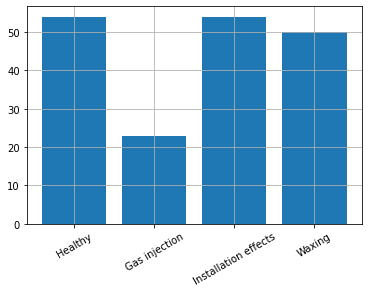

In [4]:
plt.bar(data[43].unique(),[ len(data[data[43] == k]) for k in data[43].unique()],tick_label=Faults)
plt.xticks(rotation=30)
plt.grid()

# Machine Learning
Here the interesting input features and output to predict for the task are selected, the data are opportunelly preprocessed (i.e. normalized), the dataset is splitted in two separate train and test subsets, each model is trained on the training data and evaluated against a test set. <br/>
The evaluation metrics list can be found <a href='https://scikit-learn.org/stable/modules/model_evaluation.html'>here</a>

In [5]:
#the module needed for the modeling and data mining are imported
#Cross-Validation 
from sklearn.model_selection import train_test_split
#Data normalization
from sklearn.preprocessing   import StandardScaler
#metrics to evaluate the model
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix



In [6]:
#Selection of feature and output variable, definition of the size (fraction of the total) of the random selected test set
measurements = list(range(0,43))
target       = 43
input_features = measurements
output         = target


#not preprocessed data
unnormalized_X,y = data[input_features],data[output]

# normalisation
#Having features on a similar scale can help the model converge more quickly towards the minimum
scaler_X = StandardScaler().fit(unnormalized_X)
X = scaler_X.transform(unnormalized_X)
#check if nan are present on the data after normalization to avoid trouble later
sum(np.isnan(X))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Taks 

Split the dataset X and y in train and test with test_size = 0.33 and random state = 0

In [7]:
# basic train-test dataset random split
test_size = 0.33
random_state=0
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=test_size,
                                                    random_state=random_state)

In [8]:
#dictionary to help the display of the results
Score_Dict = {}

#function introduced to simplifies the following comparison and test of the various
#return the trained model and the score of the selected metrics
def fit_predict_plot(model,X_train,y_train,X_test,y_test,class_names):
    model.fit(X_train,y_train)

    pred_y_test = model.predict(X_test)

    score = f1_score(y_test,pred_y_test,average='micro')
    
    model_name = type(model).__name__
    if(model_name=='GridSearchCV'):
        model_name ='CV_'+type(model.estimator).__name__

    #Alternative metrics are listed here:https://scikit-learn.org/stable/modules/model_evaluation.html
    Score_Dict[model_name]=score

    fig,ax = plt.subplots(1,1,figsize=[10,10])
    
    np.set_printoptions(precision=2)

    plot_confusion_matrix(model,X_test,y_test,display_labels=class_names,
                                 cmap     =plt.cm.Blues,
                                 normalize='true',
                                 xticks_rotation=45,ax=ax)
    plt.axis('tight')
    
    return model,score



## Models
Used linear models in this example are:
<ul>
   <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier">Ridge</a></li>
   <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression">Logistic Regression</a></li>
   <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier">kNN</a></li>
   <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">Support Vector Classification</a></li>
   <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">Random Forest</a></li>
</ul>

# Ridge Classifier

{'alpha': 0.1}
f1 score: 0.77


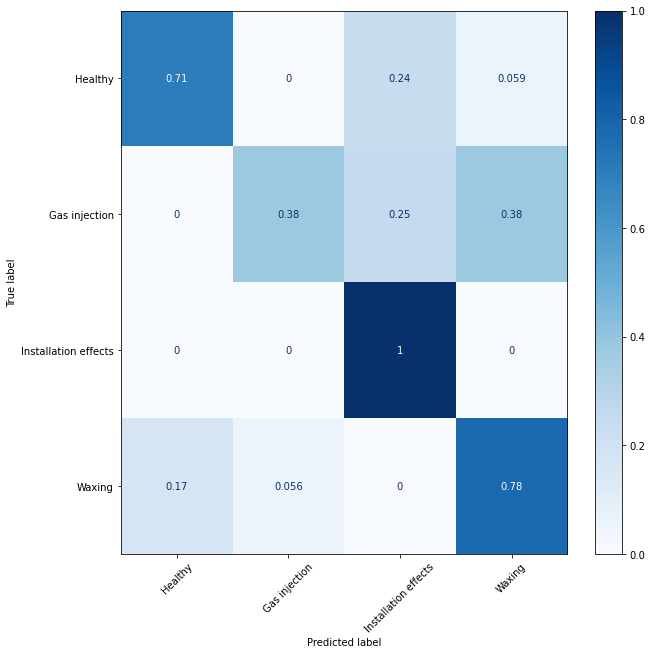

In [9]:
#initialization, fit and evaluation of the model
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
estimator = RidgeClassifier()

parameters = { 'alpha':np.logspace(-2,2,5)}
model = GridSearchCV(estimator, parameters,cv=5)

model, score = fit_predict_plot(model,X_train,y_train.values.flatten(),X_test,y_test.values.flatten(),Faults)
print(model.best_params_)
print("f1 score: %.2f"%score)

# Logistic Regression

{'C': 56.23413251903491}
f1 score: 0.90


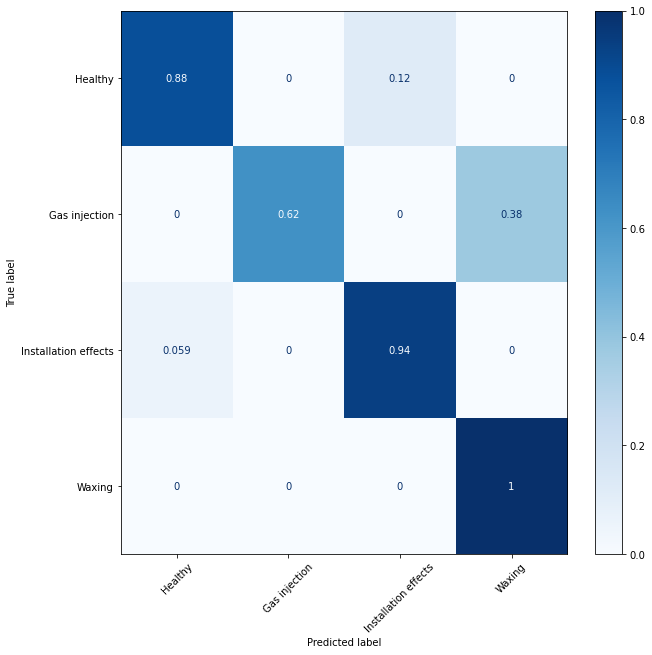

In [10]:
#initialization, fit and evaluation of the model
from sklearn import linear_model
estimator = linear_model.LogisticRegression(max_iter=1000)

parameters = { 'C':np.logspace(-2,3,5)}
model = GridSearchCV(estimator, parameters,cv=5)

model, score = fit_predict_plot(model,X_train,y_train.values.flatten(),X_test,y_test.values.flatten(),Faults)
print(model.best_params_)
print("f1 score: %.2f"%score)

# kNN

{'n_neighbors': 5}
f1 score: 0.78


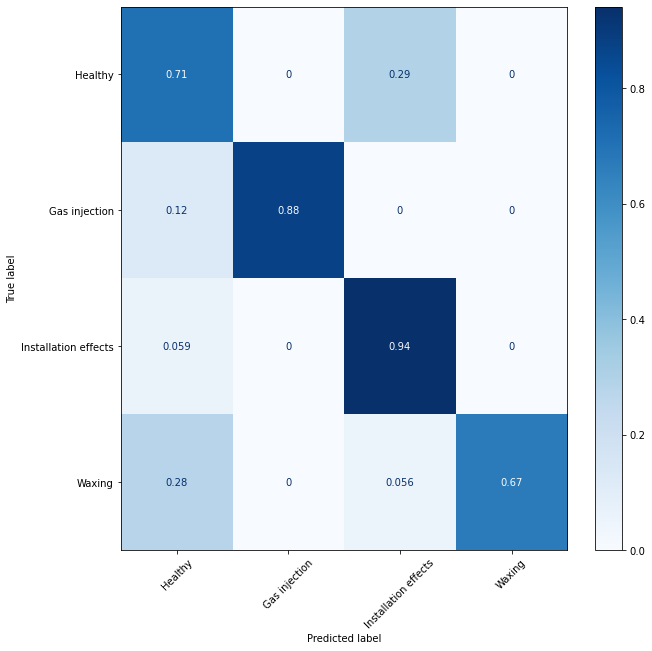

In [11]:
#initialization, fit and evaluation of the model
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()

parameters = { 'n_neighbors':[3,5,7]}
model = GridSearchCV(estimator, parameters,cv=5)

model, score = fit_predict_plot(model,X_train,y_train.values.flatten(),X_test,y_test.values.flatten(),Faults)
print(model.best_params_)
print("f1 score: %.2f"%score)

# SVC

{'C': 100}
f1 score: 0.98


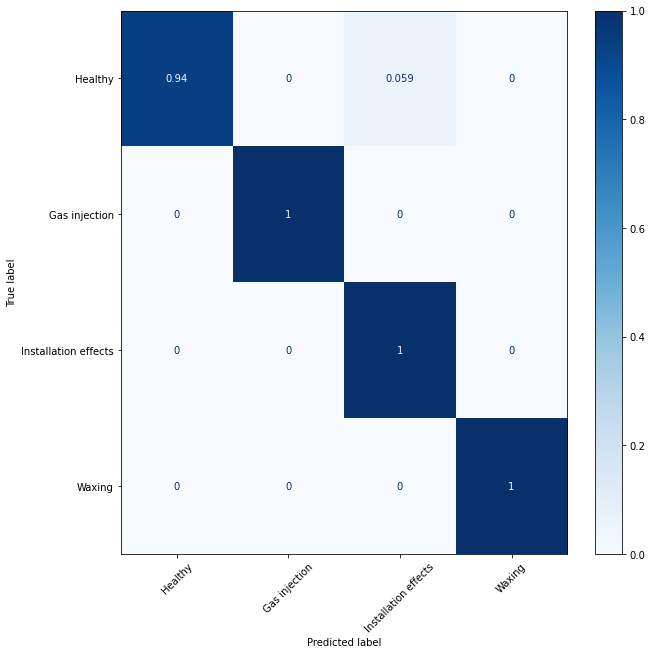

In [12]:
from sklearn.svm import SVC
estimator = SVC(gamma='auto')

parameters = { 'C':[0.1,1,10,100]}
model = GridSearchCV(estimator, parameters,cv=5)

model, score = fit_predict_plot(model,X_train,y_train.values.flatten(),X_test,y_test.values.flatten(),Faults)
print(model.best_params_)
print("f1 score: %.2f"%score)

# Random Forest

{'class_weight': 'balanced_subsample', 'min_samples_leaf': 1, 'n_estimators': 100}
f1 score: 0.97


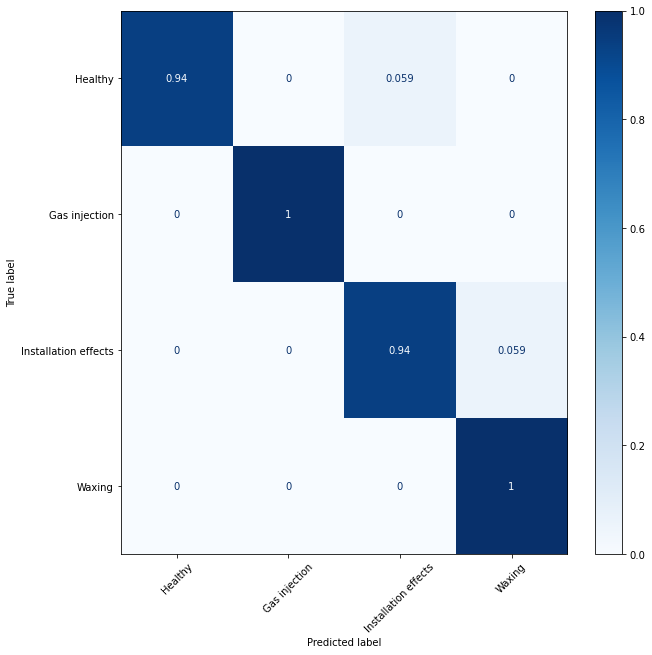

In [13]:
#initialization, fit and evaluation of the model
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier()

parameters = { 'min_samples_leaf':[1,3,5],
              'class_weight':['balanced_subsample'],
              'n_estimators':[10,100,200]}
model = GridSearchCV(estimator, parameters,cv=5)

model, score = fit_predict_plot(model,X_train,y_train.values.flatten(),X_test,y_test.values.flatten(),Faults)
print(model.best_params_)
print("f1 score: %.2f"%score)

<table><tr><th> Model</th><th> Accuracy Metric </th></tr><tr> <td>CV_RidgeClassifier</td><td>0.77</td></tr><tr> <td>CV_LogisticRegression</td><td>0.90</td></tr><tr> <td>CV_KNeighborsClassifier</td><td>0.78</td></tr><tr> <td>CV_SVC</td><td>0.98</td></tr><tr> <td>CV_RandomForestClassifier</td><td>0.97</td></tr></table>

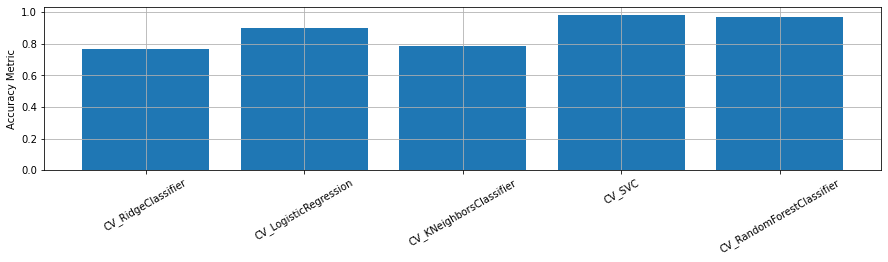

In [14]:
#print out the results in a table
from IPython.display import Markdown as md
from IPython.display import display


table = '<table><tr><th> Model</th><th> Accuracy Metric </th></tr>'

for key, value in Score_Dict.items():

    table +='<tr> <td>'+key+'</td><td>' +'%.2f'%(value)+'</td></tr>'
table+='</table>'
display(md(table))
    

names = list(Score_Dict.keys())
values = list(Score_Dict.values())

plt.figure(figsize=(15, 3))
plt.bar(names, values)
plt.ylabel('Accuracy Metric')
plt.xticks(rotation=30)
plt.grid()
